# Algoritmo de detección de señales negras y blancas

In [1]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas
from PIL import Image
#Import math Library
import math

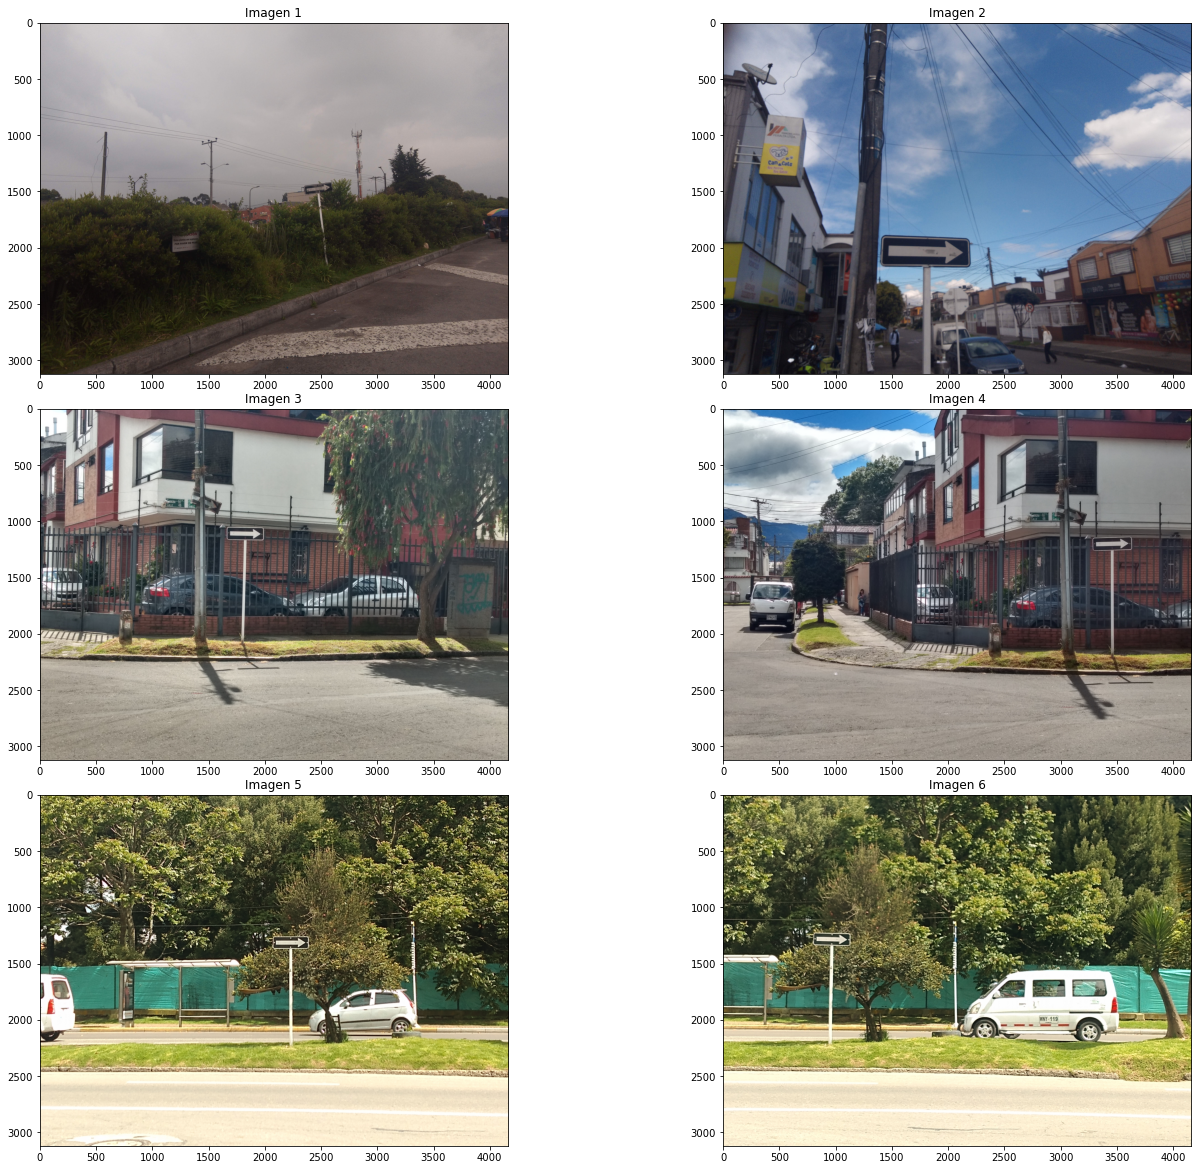

In [3]:
#lectura de las imágenes
ima1=cv2.imread("img/Flechader1.jpg")
ima2=cv2.imread("img/Flechader2.jpg")
ima3=cv2.imread("img/Flechader3.jpg")
ima4=cv2.imread("img/Flechader4.jpg")
ima5=cv2.imread("img/Flechader5.jpg")
ima6=cv2.imread("img/Flechader6.jpg")
ima7=cv2.imread("img/Cedapaso5.jpg")
ima8=cv2.imread("img/Prohibidogiroder4.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
ima7=cv2.cvtColor(ima7,cv2.COLOR_BGR2RGB)
ima8=cv2.cvtColor(ima8,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(3,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(3,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(3,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(3,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(3,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(3,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

## Umbralisación negros

In [669]:
def negro_adapt(imagen,sz,c):
    ima=cv2.cvtColor(imagen.copy(),cv2.COLOR_RGB2GRAY)
    th = cv2.adaptiveThreshold(ima,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,sz,c)
    return th

In [557]:
def umbral_hsv(imagen):
    umbral_bajo= (0,100,100)
    umbral_alto= (255,255,255)
    img_hsv=cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV)
    mask= cv2.inRange(img_hsv, umbral_bajo, umbral_alto)*255
    return mask

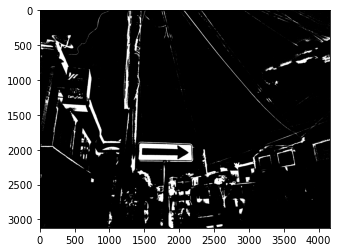

In [717]:
ima=ima2.copy()
#ima_umb=umbral_hsv(ima)
ima_umb=negro_adapt(ima,201,30)
plt.imshow(ima_umb,cmap="gray")

In [718]:
def erosion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(n):
        ima= cv2.erode(ima,kernel)
    return ima

In [719]:
#dilatación muy suave
def dilatacion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(n):
        ima= cv2.dilate(ima,kernel,n)
    return ima

(<matplotlib.image.AxesImage at 0x1e838887d00>, ([], []), ([], []))

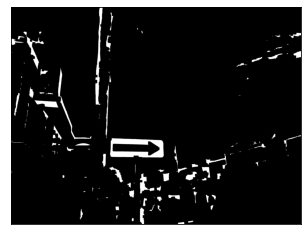

In [720]:
ima_d1=dilatacion(ima_umb.copy(),20,3,1,"rect")
ima_e1=erosion(ima_d1,30,5,1,"rect")
ima_d2=dilatacion(ima_e1,3,20,1,"rect")
ima_e2=erosion(ima_d2,5,30,1,"rect")
plt.imshow(ima_e2,cmap="gray"),plt.xticks([]), plt.yticks([])

## Llenado de señales

In [721]:
def llenado(imagen):
    
    im_floodfill = imagen.copy()
    h, w = imagen.shape
    h=h-1
    w=w-1
    #mask = np.zeros((h+2, w+2), np.uint8)
    seed=[(0,0),(0,h),(w,h),(w,0)]

    
    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, None, seed[0], 255);
    cv2.floodFill(im_floodfill, None, seed[1], 255);
    cv2.floodFill(im_floodfill, None, seed[2], 255);
    cv2.floodFill(im_floodfill, None, seed[3], 255);

     # Invert floodfilled image

    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.

    im_out = imagen | im_floodfill_inv
    return im_out

(<matplotlib.image.AxesImage at 0x1e8388d0460>, ([], []), ([], []))

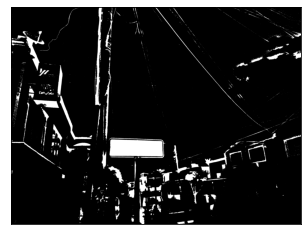

In [722]:
ima_llenado=llenado(ima_umb)
plt.imshow(ima_llenado, cmap="gray"),plt.xticks([]), plt.yticks([])

## Operaciones Morfológicas

In [723]:
def apertura(imagen,a,b,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima= cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)
    return ima

(<matplotlib.image.AxesImage at 0x1e8389153d0>, ([], []), ([], []))

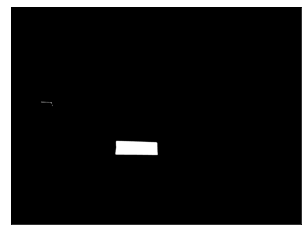

In [724]:
ima_erosion=erosion(ima_llenado,20,5,8,"rect")
plt.imshow(ima_erosion,cmap="gray"),plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x1e83895b130>, ([], []), ([], []))

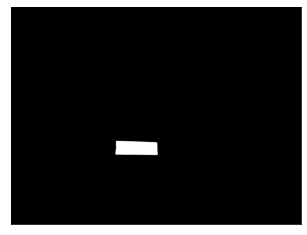

In [725]:
ima_apertura=apertura(ima_erosion,15,15,"rect")
plt.imshow(ima_apertura,cmap="gray"),plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x1e838997c10>, ([], []), ([], []))

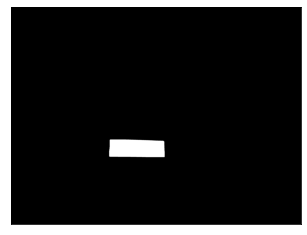

In [726]:
ima_dilatacion=dilatacion(ima_apertura,20,6,10,"rect")
plt.imshow(ima_dilatacion,cmap="gray"),plt.xticks([]), plt.yticks([])

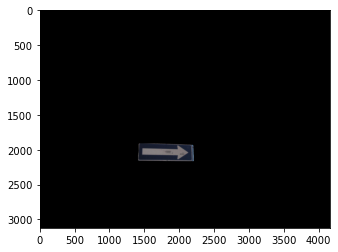

In [727]:
ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
plt.imshow(ima_final)

area del contorno0= 193738.0


(<matplotlib.image.AxesImage at 0x1e82c8b2dc0>, ([], []), ([], []))

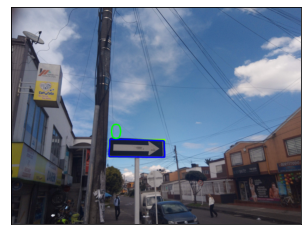

In [728]:
ima_contornos=ima.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
edges = cv2.morphologyEx(ima_dilatacion, cv2.MORPH_GRADIENT, kernel)
contours, hierarchy = cv2.findContours(edges , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    area=str(cv2.contourArea(contours[i]))
    cv2.rectangle(ima_contornos,(x,y),(x+w,y+h),(120,255,0),15)
    cv2.drawContours (ima_contornos, contours, i, (0, 0, 255), 20)
    cv2.putText(ima_contornos,str(i),(x,y-10),2,10,(0,255,0),10)
    print("area del contorno"+str(i)+"= "+area)
    
plt.imshow(ima_contornos),plt.xticks([]), plt.yticks([])

In [729]:
for i in range(len(contours)):
    #Area del contorno
    area=cv2.contourArea(contours[i])
    #Longitud del contorno
    long=cv2.arcLength(contours[i],True)
    #Posición del centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")

area del contorno 0= 193738.0
Perímetro del contorno 0= 2068.8528121709824
Posición del Centroide 0= (1802,2038 )
Redondez del contorno 0= 0.5688077277936195
Compacidad del contorno 0= 22.09247519034873



alpha usado= 0.001

area del contorno 0= 193794.0
Perímetro del contorno 0= 2048.4584369659424
Posición del Centroide 0= (1802,2038 )
Redondez del contorno 0= 0.5803578694689481
Compacidad del contorno 0= 21.652796102959595



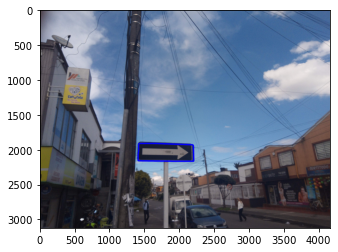

In [730]:
alpha=0.001
ima_aproximacion=ima.copy()
print("alpha usado= "+str(alpha))
print("")
for i in range(len(contours)):
    cnt=contours[i]
    epsilon = alpha*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    #Area del contorno
    area=cv2.contourArea(approx)
    #Longitud del contorno
    long=cv2.arcLength(approx,True)
    #Posición del centroide
    M = cv2.moments(approx)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    #dibujar contornos
    cv2.drawContours (ima_aproximacion, [approx], 0, (0, 0, 255), 20)
    
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")
    plt.imshow(ima_aproximacion)

Longitud lado largo 0= 798.0401000976562
Longitud Lado corto 0= 251.01792907714844
Relación entre lados 0= 3.179215536641547



(<matplotlib.image.AxesImage at 0x1e82c3da4f0>, ([], []), ([], []))

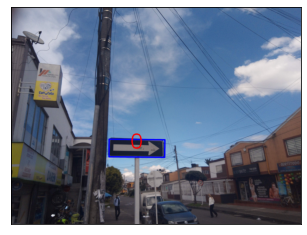

In [731]:
ima_min_rect=ima.copy()
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    #posición Centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    #Longitudes rectangulo
    a=cv2.arcLength(np.array([box[0],box[1]]),False)
    b=cv2.arcLength(np.array([box[0],box[3]]),False)
    
    largo=np.max([a,b])
    corto=np.min([a,b])
    rel=largo/corto
    
    cv2.drawContours(ima_min_rect,[box],0,(0,0,255),20)
    cv2.putText(ima_min_rect,str(i),(cx-100,cy),2,10,(255,0,0),10)
    print("Longitud lado largo "+str(i)+"= "+str(largo))
    print("Longitud Lado corto "+str(i)+"= "+str(corto))
    print("Relación entre lados "+str(i)+"= "+str(rel))
    print("")
plt.imshow(ima_min_rect),plt.xticks([]), plt.yticks([])

In [732]:
def getCharacteristics(contornos):
    caracteristicas=[]
    for i in range(len(contornos)):
        cont=contours[i]
        #Area del contorno
        area=cv2.contourArea(cont)
        #Longitud del contorno
        long=cv2.arcLength(cont,True)
        #Posición del centroide
        M = cv2.moments(cont)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cent=(cx,cy)
        #compacidad
        comp=long**2/area
        #redondez
        redon=4*np.pi*area/long**2
        #mínimo rectangulo
        rect = cv2.minAreaRect(cont)
        box = cv2.boxPoints(rect)
    
        #Longitudes rectangulo
        a=cv2.arcLength(np.array([box[0],box[1]]),False)
        b=cv2.arcLength(np.array([box[0],box[3]]),False)
    
        largo=np.max([a,b])
        corto=np.min([a,b])
        rel=largo/corto
        
        #rectangulo limite
        x,y,w,h=cv2.boundingRect(contours[i])
        rect_lim={"x":x,
                 "y":y,
                 "w":w,
                 "h":h}
        
        diccionario={"Area":area,
                    "Perimetro":long,
                    "Centroide":cent,
                    "Compacidad":comp,
                    "Redondez":redon,
                    "Minimo Rectangulo":box,
                    "Lado largo":largo,
                    "Lado corto":corto,
                    "Relacion entre lados":rel,
                    "Rectangulo limite":rect_lim}
        caracteristicas.append(diccionario)
    return caracteristicas

In [733]:
caracteristicas=getCharacteristics(contours)
imagenes=[]
for i in range(len(contours)):
    #obtiene la relación de lados
    com=caracteristicas[i].get("Compacidad")
    if com<24 and com>21 :
        rect_lim=caracteristicas[i].get("Rectangulo limite")
        x_ini=rect_lim.get("x")
        x_fin=rect_lim.get("x")+rect_lim.get("w")
        y_ini=rect_lim.get("y")
        y_fin=rect_lim.get("y")+rect_lim.get("h")
        imagen_cortada=ima_final[y_ini:y_fin,x_ini:x_fin,:]
        print(x_ini)
        print(x_fin)
        print(y_ini)
        print(x_fin)
        print("")
        imagenes.append(imagen_cortada)

1407
2206
1909
2206



(<matplotlib.image.AxesImage at 0x1e838a3b430>, ([], []), ([], []))

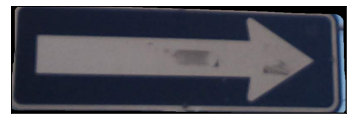

In [735]:
plt.imshow(imagenes[0]),plt.xticks([]), plt.yticks([])

In [738]:
th=[]
for i in range(len(imagenes)):
    ima_gris=cv2.cvtColor(imagenes[i],cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(ima_gris,100,255,cv2.THRESH_BINARY)
    th.append(th1)

(<matplotlib.image.AxesImage at 0x1e838a6e070>, ([], []), ([], []))

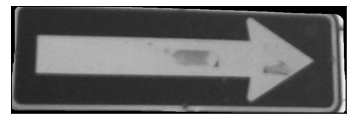

In [739]:
ima_gris=cv2.cvtColor(imagenes[0],cv2.COLOR_BGR2GRAY)
plt.imshow(ima_gris,cmap="gray"),plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x1e838aa67c0>, ([], []), ([], []))

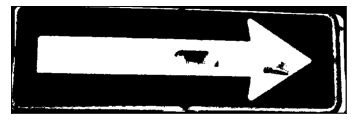

In [740]:
plt.imshow(th[0],cmap="gray"),plt.xticks([]), plt.yticks([])